In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.random as npr
from scipy.stats import norm

## Exercise 1

In [ ]:
#Since we know the solution to this SDE, 

In [26]:
np.random.seed(200)
S0 = 100 
r = 0.05 
T = (1/12)
I = 100000 
M = 50
dt = T/M
q = 0.01


#Using the exact scheme
S_exact = np.zeros((M+1, I))
S_exact[0] = S0
for t in range(1, M + 1):
    if t <= M/2:
        sigma = 0.5
    elif t > M/2:
        sigma = 0.2
    S_exact[t] = S_exact[t - 1] * np.exp(((r-q) - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))
    

In [27]:
ST_exact = S_exact[-1]
sd_ST_exact = (ST_exact-ST_exact.mean())/ST_exact.std()

Text(0.5, 1.0, 'Simulated paths')

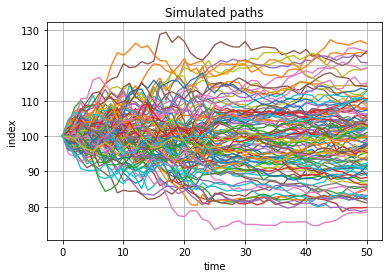

In [28]:
plt.plot(S_exact[:, :100], lw=1.3)
plt.xlabel('time')
plt.ylabel('index')
plt.grid(True)
plt.title('Simulated paths')

## Exercise 2

In [17]:
I = 10000
K = 105

hT = np.maximum (S_exact[t]-K, 0)
p0 = np.exp(-r*T)*np.mean(hT)
print('Price of european option is', p0)

Price of european option is 0.732310381360378


## Exercise 3

In [13]:
stdd = np.sqrt(0.5*0.5**2+0.5*0.2**2)



def bs (S0,q,K,r,T,stdd):
    d1 = (np.log(S0/K)+((r-q)+0.5*stdd**2)*T)/(stdd * np.sqrt(T))
    d2 = d1 - stdd*np.sqrt(T)
    c = S0*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    return c
    

In [16]:
pb = bs(S0, q, K, r, T,stdd)

In [18]:
#difference
p0-pb

-1.802991477462335

## Alternative Approach

In [1]:
#choose the dynamic approach, simulating paths as we did in task 1

In [2]:
def gen_sn(M, I):
    sn = npr.standard_normal((M+1, I))
    return sn

In [22]:
M = 50
def mcs_dyna(K): 
    dt = T / M
# simulation of index level paths 
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I) #set the simulation of paths
    for t in range(1, M + 1):
            S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
                    + sigma * np.sqrt(dt) * sn[t]) #using the same formula as above
    
    
    hT = np.maximum(S[-1] - K, 0)
    
    C0 = np.exp(-r * T) * np.mean(hT) 
    return C0

In [39]:
dynamic = mcs_dyna(K)
bsm_exact = bs (S0,q,K,r,T,stdd)



In [40]:
dynamic - bsm_exact

-1.793683541998263